<a href="https://colab.research.google.com/github/tuomaseerola/music_and_science_seminar/blob/master/build_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build a Regression Model

To run the code in your browser, open the file in Colab (click the icon "Open in Colab"). Alternatively, you can download the notebook and run it locally.

This notebook demonstrates running inferential statistical tests in R.

File `build_regression_model.ipynb` | Version `2/3/2023` |

---

## Preliminaries
Load libraries and install `MusicScienceData` package where the example data is stored.

In [1]:
library(ggplot2,quietly = TRUE)
library(tidyverse,quietly = TRUE)
if (!require(devtools)) install.packages("devtools",quiet=TRUE)
devtools::install_github("tuomaseerola/MusicScienceData@main",quiet=TRUE)
library(MusicScienceData,quiet=TRUE)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0
✔ purrr   1.0.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: devtools

Loading required package: usethis



## Grab a dataset
These are the raw ratings of emotions for the film soundtracks (Eerola & Vuoskoski, 2011).

In [3]:
d <- read.csv('https://raw.githubusercontent.com/tuomaseerola/emr/main/data/raw_ratings.csv')
d2 <- dplyr::filter(d,Emotion=='Dimensional')  #
d3 <- dplyr::filter(d2, Category=='Anger' |
  Category=='Fear' |
  Category=='Happy' |
  Category=='Sad' |
  Category=='Tender')

## Code 7.7

## Explore how features and ratings correlate

In [4]:
library(MusicScienceData)               # loads library w data
d1 <- MusicScienceData::soundtrack      # get ratings
d2 <- MusicScienceData::soundtrack_features[,c(2:3,5:6)] #
d1[,17:21] <- as.data.frame(scale(d2))  # normalise

tmp <- cor(d1[,c(3,17:20)]) # get correlations
print(round(tmp[2:5,1],2))  # display first line


         RMS     sp_centr spec_rolloff     spec_zcr 
        0.58         0.36         0.40         0.32 


## Construct a model

In [5]:
model.reg <- lm(Energy ~ RMS + sp_centr + spec_rolloff +
  spec_zcr, data = d1)
s <- summary(model.reg) # R2adj = 0.424 (Energy)
print(s)


Call:
lm(formula = Energy ~ RMS + sp_centr + spec_rolloff + spec_zcr, 
    data = d1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4719 -1.1042 -0.2064  0.9427  3.4504 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    5.4865     0.1309  41.905  < 2e-16 ***
RMS            0.9067     0.1397   6.491 2.88e-09 ***
sp_centr      -1.9069     1.2245  -1.557    0.122    
spec_rolloff   1.9663     0.9502   2.069    0.041 *  
spec_zcr       0.5995     0.4170   1.438    0.154    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.373 on 105 degrees of freedom
Multiple R-squared:  0.4504,	Adjusted R-squared:  0.4295 
F-statistic: 21.52 on 4 and 105 DF,  p-value: 5.528e-13



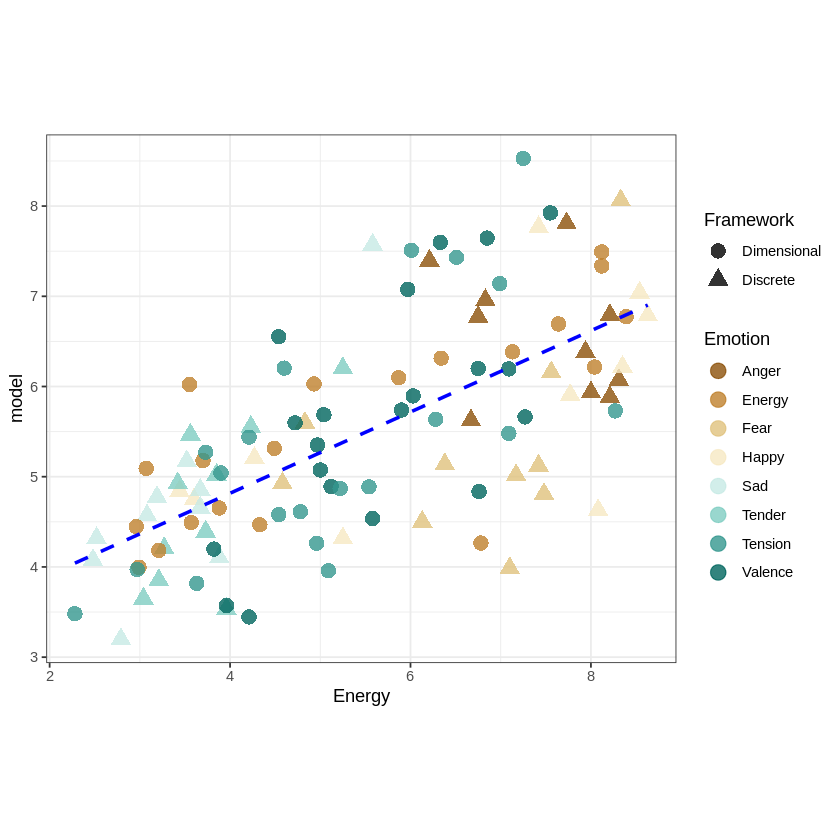

In [19]:
d1$model <- predict(model.reg,newdata = d1)
g9 <- ggplot(d1) +
  aes(x = Energy, y = model, colour = TARGET_EMOTION,
      shape= TARGET_FRAMEWORK) +
  geom_point(size=4,alpha=0.80,show.legend=TRUE) +
  coord_fixed(ratio = 1)+
  geom_smooth(aes(shape = NULL,colour=NULL),method="lm",
              formula='y ~x',se=FALSE, fullrange=TRUE,
              level=0.95, colour='blue', # adds trendline
              linetype='dashed',show.legend = FALSE)+
  scale_colour_brewer(name='Emotion',type = 'div')+
  scale_shape(name='Framework')+
  theme_bw()
print(g9)